In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import PyPDF2 as pyp
import numpy as np
import random
import os 
import wget
from urllib.request import urlopen

In [2]:
Lincoln_file = wget.download('https://raw.githubusercontent.com/GMU-instructor/Data-files/main/prez_address/Address_Lincoln.pdf')
Lincoln_pdf = open(Lincoln_file, 'rb')
Washington_file = wget.download('https://raw.githubusercontent.com/GMU-instructor/Data-files/main/prez_address/Address_Washington.pdf')
Washington_pdf = open(Washington_file, 'rb')
Reagan_file = wget.download('https://raw.githubusercontent.com/GMU-instructor/Data-files/main/prez_address/Address_Reagan.pdf')
Reagan_pdf = open(Reagan_file, 'rb')
JFK_file = wget.download('https://raw.githubusercontent.com/GMU-instructor/Data-files/main/prez_address/Address_JFK.pdf')
JFK_pdf = open(JFK_file, 'rb')

In [3]:
#Creating a pdf file object using PyPDF.
#Extract text from pdfs

JFK_read_pdf = pyp.PdfFileReader(JFK_pdf)
Lincoln_read_pdf = pyp.PdfFileReader(Lincoln_pdf)
Washington_read_pdf = pyp.PdfFileReader(Washington_pdf)
Reagan_read_pdf = pyp.PdfFileReader(Reagan_pdf)
JFK_data = ""
Lincoln_data = ""
Washington_data = ""
Reagan_data = ""

Jnum_pages = JFK_read_pdf.numPages
for i in range(Jnum_pages) : 
        Jpage = JFK_read_pdf.getPage(i) 
        JFK_data = JFK_data + Jpage.extractText()
Lnum_pages = Lincoln_read_pdf.numPages
for i in range(Lnum_pages) : 
        Lpage = Lincoln_read_pdf.getPage(i)
        Lincoln_data = Lincoln_data + Lpage.extractText()
Wnum_pages = Washington_read_pdf.numPages
for i in range(Wnum_pages) : 
        Wpage = Washington_read_pdf.getPage(i)
        Washington_data = Washington_data + Wpage.extractText()
Rnum_pages = Reagan_read_pdf.numPages
for i in range(Rnum_pages) : 
        Rpage = Reagan_read_pdf.getPage(i)
        Reagan_data = Reagan_data + Rpage.extractText()

Xref table not zero-indexed. ID numbers for objects will be corrected.


In [4]:
#Perform NLP on data to create more meaningful word clouds
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [Reagan_data, JFK_data, Washington_data, Lincoln_data]
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .6, min_df = .01)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
data = df.transpose()
#Make sure you have these in the same order as your corpus above
data.columns = ['Reagan', 'JFK', 'Washington', 'Lincoln']

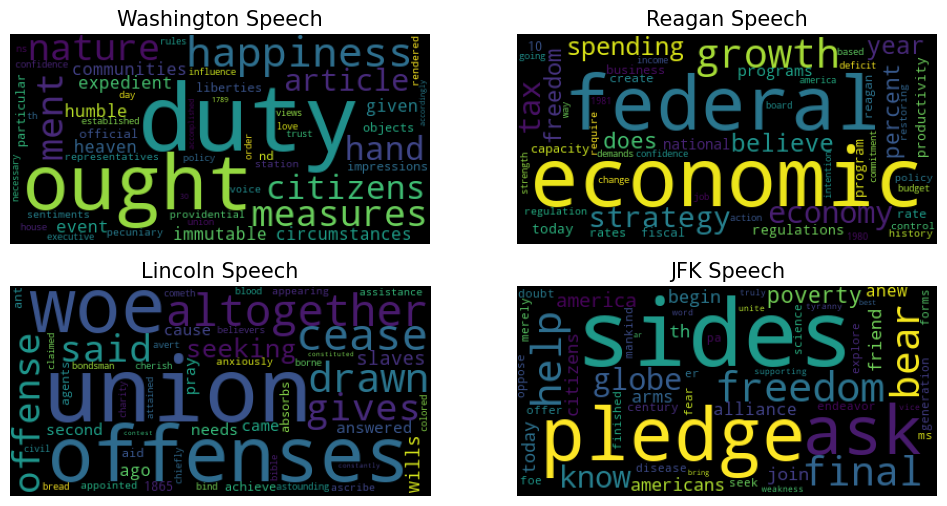

In [5]:
#Show wordclouds
colors = "viridis"
maxwords = 50

# Set overall figure size
f = plt.figure(figsize=(12,6))
f.tight_layout()

# Subplot 1
plt.subplot(2, 2, 1)
Washington_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['Washington'])
plt.imshow(Washington_wordcloud)
plt.axis('off')
plt.title('Washington Speech', fontsize=15)
# Subplot 2
plt.subplot(2, 2, 2)
Reagan_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['Reagan'])
plt.imshow(Reagan_wordcloud)
plt.axis('off')
plt.title('Reagan Speech', fontsize=15)
# Subplot 3
plt.subplot(2, 2, 3)
Lincoln_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['Lincoln'])
plt.imshow(Lincoln_wordcloud)
plt.axis('off')
plt.title('Lincoln Speech', fontsize=15)
# Subplot 4
plt.subplot(2, 2, 4)
JFK_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['JFK'])
plt.imshow(JFK_wordcloud)
plt.axis('off')
plt.title('JFK Speech', fontsize=15);
